In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [2]:
df = pd.read_csv(r"online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

In [5]:
# Identify duplicates (across all columns)
duplicates = df[df.duplicated()]

# Print duplicates
duplicates

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
483,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
512,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
540,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
554,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
589,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


In [23]:
print("Number of duplicates:", len(duplicates))

Number of duplicates: 125


In [24]:
df = df.drop_duplicates()
print("Number of duplicates:", len(df[df.duplicated()]))

Number of duplicates: 0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [9]:
# Checking the distribution of target variable
display(df['Revenue'].value_counts(), df['Revenue'].value_counts(normalize = True)*100)

0    10422
1     1908
Name: Revenue, dtype: int64

0    84.525547
1    15.474453
Name: Revenue, dtype: float64

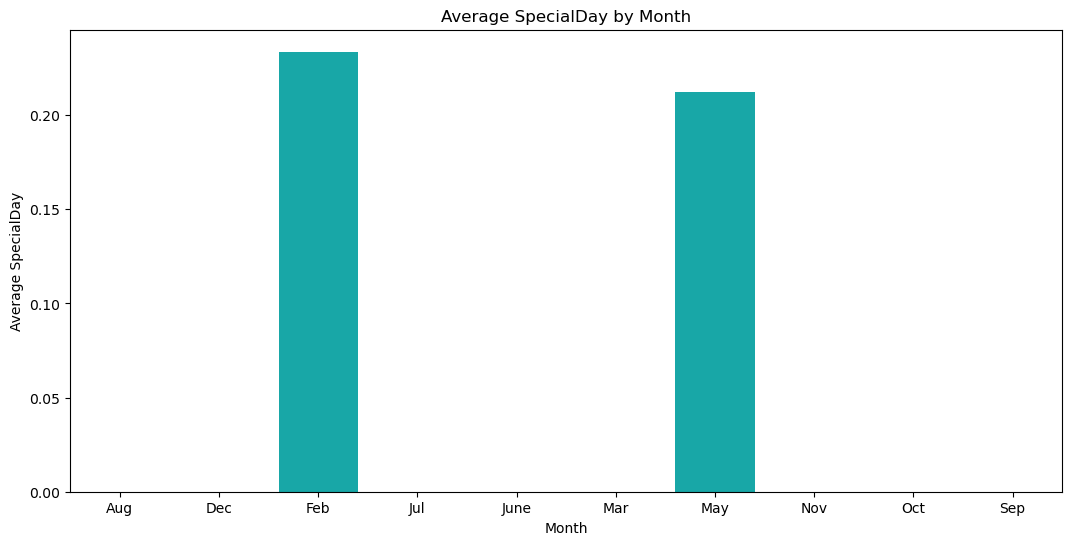

In [10]:
# Group by Month and calculate the average SpecialDay
avg_specialday_by_month = df.groupby('Month')['SpecialDay'].mean().reset_index()

# Create a bar plot
fig = plt.figure(figsize=(12.8, 6))
sns.barplot(x='Month', y='SpecialDay', data=avg_specialday_by_month, color='c')
plt.title('Average SpecialDay by Month')
plt.xlabel('Month')
plt.ylabel('Average SpecialDay')
plt.show()

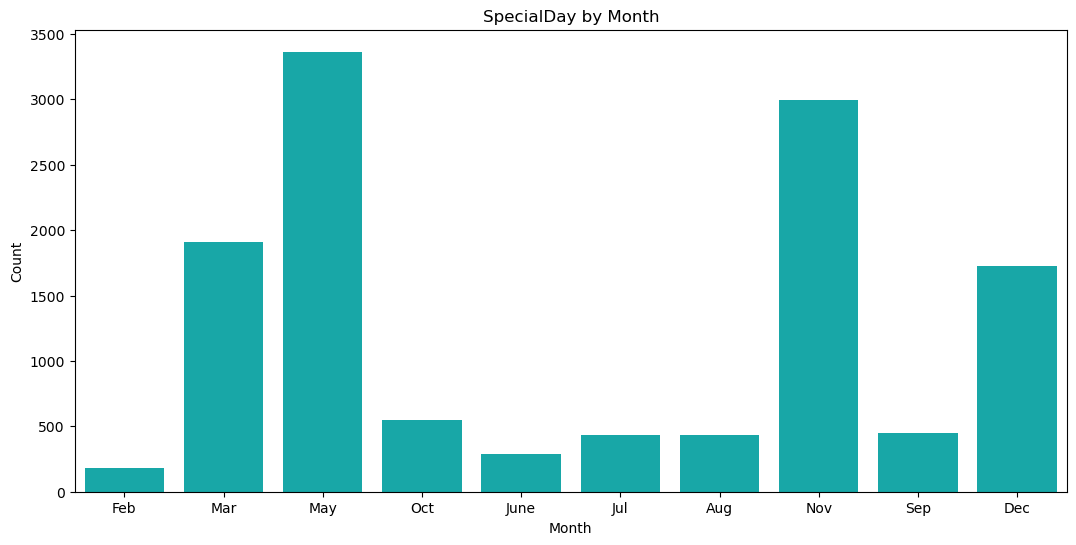

In [11]:
# Filter the data for SpecialDay > 0
filtered_data = df[df['SpecialDay'] <= 1]

# Create a count plot to show the distribution of months
fig = plt.figure(figsize=(12.8, 6))
sns.countplot(x='Month', data=filtered_data, color='c')
plt.title('SpecialDay by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Average SpecialDay for November: 0.233695652173913


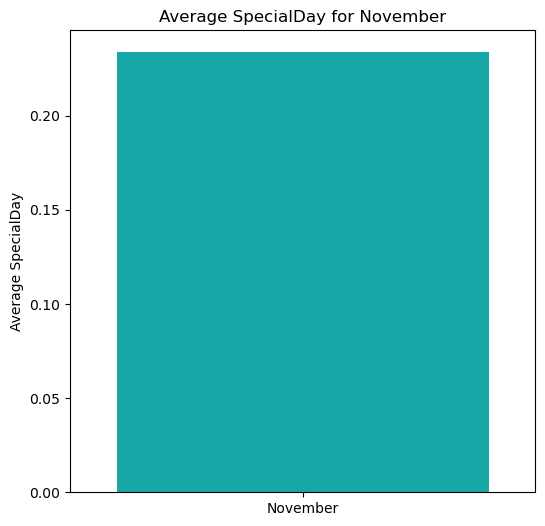

In [12]:
# Filter the data for November
november_data = df[df['Month'] == 'Feb']

# Calculate the average SpecialDay for November
avg_specialday_november = november_data['SpecialDay'].mean()

# Print the result
print(f"Average SpecialDay for November: {avg_specialday_november}")

# Optional: Visualize it as a single bar plot
fig = plt.figure(figsize=(6, 6))
sns.barplot(x=['November'], y=[avg_specialday_november], color='c')
plt.title('Average SpecialDay for November')
plt.ylabel('Average SpecialDay')
plt.show()

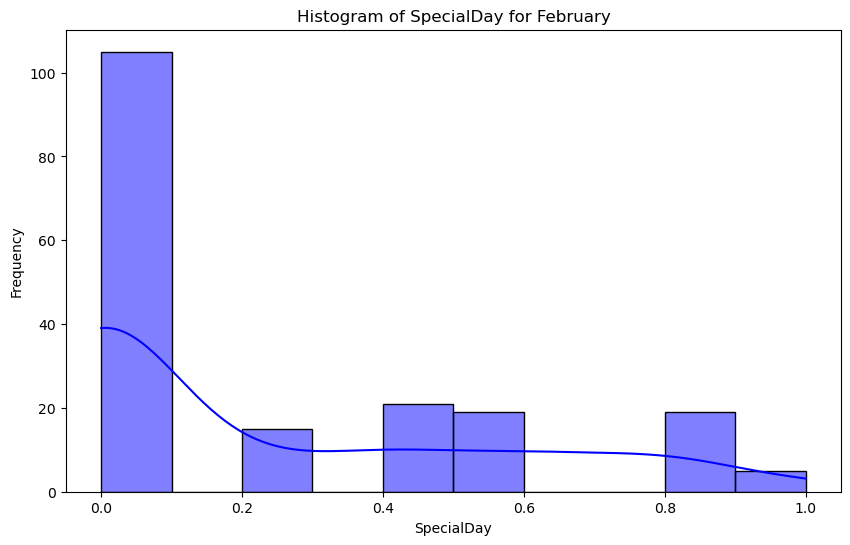

In [13]:
# Filter the data for February
february_data = df[df['Month'] == 'Feb']

# Plot the histogram
fig = plt.figure(figsize=(10, 6))
sns.histplot(february_data['SpecialDay'], bins=10, kde=True, color='blue')
plt.title('Histogram of SpecialDay for February')
plt.xlabel('SpecialDay')
plt.ylabel('Frequency')
plt.show()

In [14]:
df['VisitorType'].unique() 
# Should change to numerical

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [15]:
df[df['VisitorType'] == "Other"].count()

Administrative             85
Administrative_Duration    85
Informational              85
Informational_Duration     85
ProductRelated             85
ProductRelated_Duration    85
BounceRates                85
ExitRates                  85
PageValues                 85
SpecialDay                 85
Month                      85
OperatingSystems           85
Browser                    85
Region                     85
TrafficType                85
VisitorType                85
Weekend                    85
Revenue                    85
dtype: int64

# Target Revenue, 

## Notes
- Consider remove Other from VisitorType
- No Informational_Duration for 0 Revenue 
- No Page_Values for 0 Revenue 
- Special Day is from 0 to 1 not 0 AND 1
- PageValues: a metric that measures how important a page is to a website's revenue
- Sum lai roi tinh => better for biased dataset


## Special observations
- Inspect month with Revenue deeper (Maybe correlate with Special Day), e.g Nov, Dec have higher buy rates because Christmas & Black Friday & Cyber Monday, March: Women's Day
- SpecialDay only recognize Women's Day and Mother's Day which may lead to poor model evaluation, tried to feature engineer for other special days in the year (Christmas, New Year) but is impossible because we don't know the specific day (before or after that day) => consider dropping.
- Exit rate and BounceRate often leads to no transaction
- Other might be Customers using Incognito mode or have technical issues with browser or even accidental visit and the site have not finished identifying the user
- Page Values for Others and New Visitors may be higher because they go straight to the high value page through ads and links whereas Returning Visitors tend to check many pages.
- On Special Day returning visitors are the primary visitor due to familiarity with the platform, as for New Visitors, they probably only discover the site from advertisement campaigns.
- OS 1,2,3 and Browser 1,2 have the most entries => developers should focus on these OS and Browsers
- Administrative vs Revenue
- The higher the total duration spent on the app the higher chance they will buy sth

## Varibles to plot
- Distribution of all variables
- Administrative_Duration vs Revenue 
- Exit Rate with Revenue
- Total duration vs Revenue
- Bounce Rate with Revenue
- Exit Rate vs Bounce Rate => show Multicollinerity
- Correlation Heatmap
- Page Value vs Visitor Type
- Revenue by Month
- Special Day vs Visitor Type
- Special Day by Month